# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Eduardo Garcia do Nascimento

**RA/CPF**: 22008732800


---
### Carregamento dos dados

Nesta seção é feita a carga dos atributos em um dataframe só, ou seja, os três datasets são lidos e concatenados para que a redução de atributos leve em conta o que existe de melhor em todos eles.


In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "data"

import numpy as np 
import pandas as pd 
import os
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from scripts import utils

if __name__ == '__main__':
                       
    # importa o arquivo e guarda em um dataframe do Pandas
    set1_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set1.csv'), sep=',', low_memory=False)
    set2_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set2.csv'), sep=',', low_memory=False) 
    set3_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set3.csv'), sep=',', low_memory=False)
    train_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'train.csv'), sep=',')
    test_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'test.csv'), sep=',')
    
    # Renomeia colunas concatenando o setX antes de fazer o merge para identificá-las posteriormente
    cols = set1_dataset.columns
    for col in cols:
        set1_dataset = set1_dataset.rename(columns={col:'set1_'+col})
        
    cols = set2_dataset.columns
    for col in cols:
        set2_dataset = set2_dataset.rename(columns={col:'set2_'+col})
    
    cols = set3_dataset.columns
    for col in cols:
        set3_dataset = set3_dataset.rename(columns={col:'set3_'+col})

    # Concatena os datasets em somente um dataset único
    frames = [ set1_dataset, set2_dataset, set3_dataset ]
    input_dataset = pd.concat(frames, axis=1)
    
    print('A base de dados inicial combinada tem %d amostras com %d atributos' % (input_dataset.shape[0],
                                                                                 input_dataset.shape[1]))
    
        
   
    utils.beep(1, 400)

A base de dados inicial combinada tem 60842 amostras com 309 atributos


---
### Pré-processamento e seleção de atributos

Nesta seção são feitas limpezas da base de dados como:

* Remoção de atributos sem variância;
* Tratamento de outliers e dados nulos;
* Seleção dos atributos que terão maior valor para o algoritmo de classificação.

In [2]:
# Remove os atributos que são constantes e não oferecem nenhum valor aos algoritmos de classificação
variance_mask = VarianceThreshold().fit(input_dataset).get_support()
input_dataset = input_dataset.iloc[:,variance_mask]
print('Atributos removidos por baixa variância: %d' % np.sum(~variance_mask))

# Tratamento de outliers e entradas nulas
df = input_dataset.copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print("Número de outliers substituídos por valores nulos:", np.sum(np.sum(mask)))
df[mask] = np.nan
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
input_dataset.loc[:,:] = imp_mean.fit_transform(input_dataset)

# Normalização dos dados entre 0 e 1
input_dataset.loc[:,:] = MinMaxScaler().fit_transform(input_dataset)

# Adiciona as classes junto ao dataset de atributos para fazer a seleção de atributos
input_dataset['classe'] = np.nan
input_dataset.loc[train_dataset['Id'].values,'classe'] = train_dataset['Class'].values

backup_dataset = input_dataset.copy()

mask = ((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1))

cols = list(input_dataset.columns)
cols.remove('classe')

# Seleciona os melhores atritubos para treinametno do algoritmo de classificação
print('Selecionando melhores features....................................')
#selector = SelectKBest(f_classif, k=6).fit(
#    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1), cols].values,
#    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1),'classe'].values)
#mask = selector.get_support()
#mask = np.append(mask, True)
#input_dataset = input_dataset.iloc[:,mask]

from sklearn.feature_selection import SelectPercentile, chi2
selector = SelectPercentile(f_classif,percentile=15).fit(
    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1), cols].values,
    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1),'classe'].values)

mask = selector.get_support()
mask = np.append(mask, True)
input_dataset = input_dataset.iloc[:,mask]

display(input_dataset.head(10))
display(input_dataset.describe())

utils.beep(1, 500)

Atributos removidos por baixa variância: 6
Número de outliers substituídos por valores nulos: 1485512
Selecionando melhores features....................................


,set1_D0015,set1_D0016,set2_D0006,set2_D0007,set2_D0015,set2_D0016,set2_D0017,set2_D0030,set2_D0031,set2_D0039,...,set3_D0039,set3_D0040,set3_D0041,set3_D0049,set3_D0118,set3_D0119,set3_D0120,set3_D0121,set3_D0143,classe
0,0.003589,0.001227,0.054795,0.089041,0.034247,0.061644,0.102740,0.054795,0.089041,0.034247,...,0.953626,0.940740,0.905553,0.903394,0.996289,0.993571,0.990868,0.988128,0.796120,NaN
1,0.004038,0.001381,0.172414,0.275862,0.206897,0.275862,0.379310,0.134454,0.184874,0.134454,...,0.933123,0.962905,0.930120,0.930186,0.995425,0.992865,0.990311,0.987698,0.784540,NaN
2,0.007627,0.002608,0.141104,0.184049,0.079755,0.171779,0.202454,0.141104,0.184049,0.079755,...,0.946059,0.940740,0.905553,0.911674,0.994724,0.991626,0.988532,0.985429,0.784640,NaN
3,0.000449,0.006444,0.083333,0.166667,0.083333,0.166667,0.166667,0.107759,0.193966,0.077586,...,0.933123,0.933275,0.920568,0.894126,0.997281,0.994195,0.991316,0.988677,0.824504,NaN
4,0.010319,0.003529,0.160000,0.252000,0.124000,0.236000,0.304000,0.160000,0.252000,0.124000,...,0.946059,0.940740,0.910651,0.890049,0.996491,0.993701,0.990592,0.987643,0.934402,NaN
5,0.000449,0.003682,0.065972,0.114583,0.038194,0.100694,0.138889,0.095445,0.156182,0.069414,...,0.933123,0.972674,0.946358,0.872578,0.998937,0.992846,0.990291,0.985632,0.881118,NaN
6,0.003589,0.003682,0.130769,0.184615,0.138462,0.192308,0.238462,0.162362,0.309963,0.055351,...,0.933123,0.920514,0.886083,0.838141,0.997140,0.993963,0.991197,0.988334,0.866645,NaN
7,0.023777,0.008131,0.046169,0.153242,0.135560,0.194499,0.264244,0.046169,0.153242,0.135560,...,0.985997,0.985969,0.978787,0.915040,0.996727,0.992488,0.988505,0.984784,0.882974,NaN
8,0.000897,0.000307,0.076923,0.076923,0.000000,0.076923,0.076923,0.076923,0.076923,0.000000,...,0.953626,0.950144,0.917836,0.931043,0.978740,0.967196,0.961710,0.957489,0.770444,NaN
9,0.004038,0.001381,0.090278,0.152778,0.076389,0.118056,0.159722,0.090278,0.152778,0.076389,...,0.976095,0.964660,0.930120,0.918781,0.996298,0.993326,0.990344,0.987320,0.800495,NaN


,set1_D0015,set1_D0016,set2_D0006,set2_D0007,set2_D0015,set2_D0016,set2_D0017,set2_D0030,set2_D0031,set2_D0039,...,set3_D0039,set3_D0040,set3_D0041,set3_D0049,set3_D0118,set3_D0119,set3_D0120,set3_D0121,set3_D0143,classe
count,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,...,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,4564.000000
mean,0.005386,0.002250,0.105555,0.156703,0.077119,0.133466,0.192005,0.104544,0.155268,0.075154,...,0.943188,0.943219,0.922438,0.907242,0.991490,0.987749,0.984214,0.980861,0.813226,-0.825153
std,0.012291,0.009757,0.082787,0.098924,0.072609,0.093063,0.108784,0.081293,0.095600,0.067977,...,0.108226,0.108845,0.108504,0.105646,0.011672,0.013029,0.013859,0.014530,0.048363,0.513349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000449,0.000153,0.058252,0.100000,0.039773,0.085492,0.140271,0.057391,0.099345,0.039735,...,0.933123,0.940740,0.910651,0.904263,0.991494,0.987019,0.982566,0.978348,0.783975,-1.000000
50%,0.002692,0.001074,0.090909,0.141907,0.064309,0.121164,0.182006,0.089796,0.140777,0.062937,...,0.953626,0.953501,0.928578,0.920484,0.995189,0.992217,0.989187,0.986182,0.803545,-1.000000
75%,0.006281,0.002301,0.133498,0.198495,0.095890,0.166667,0.232759,0.131935,0.195489,0.093023,...,0.966561,0.967735,0.955053,0.935119,0.996796,0.994121,0.991318,0.988588,0.835213,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
### Análise exploratória

Nesta seção são exibidas informações do resultado após os dados serem pré-processados e os atributos selecionados. Dentre as ferramentas para análise exploratória que serão utilizados estão:

* Descritivo resumido da base.
* Análises de covariância e correlação.
* Matriz de disperação entre todos os atributos selecionados. 
* Diagramas de violino para visualização dos quartis e outliers como uma variação aos diagramas de caixa.
* Gráfico de dispersão com a dimensionalidade reduzida a somente 2 atributos.

Análise e visualização dos dados:
Número de posts comuns: 4038
Número de posts não reconhecidos (podem ser phishing ou não): 272
Número de posts phishing: 254


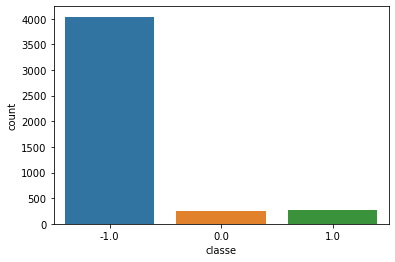

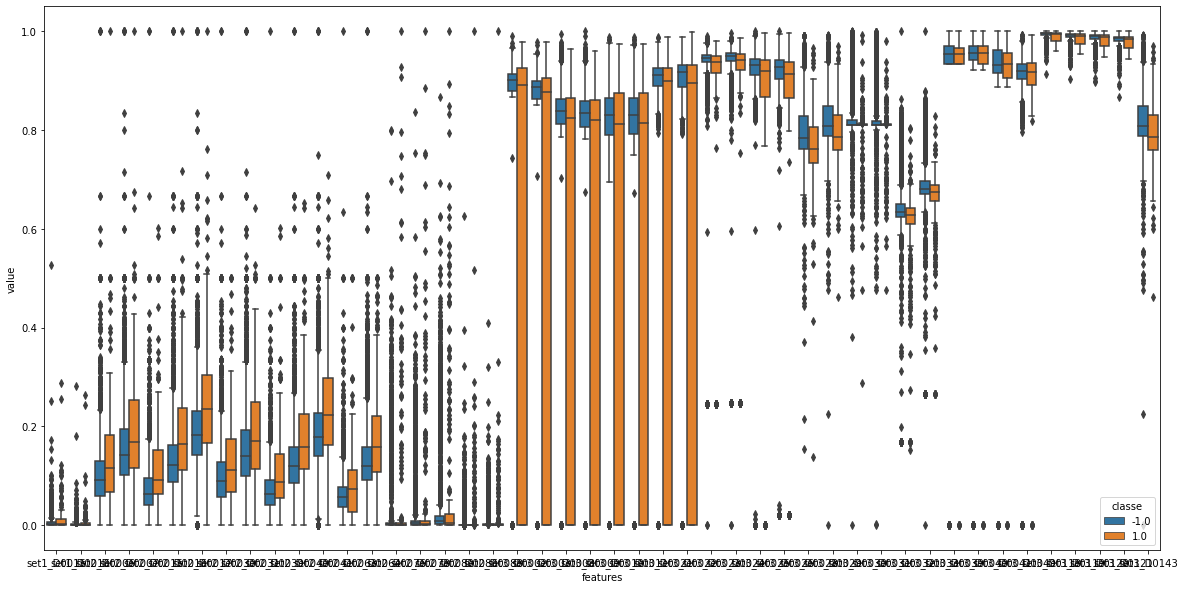

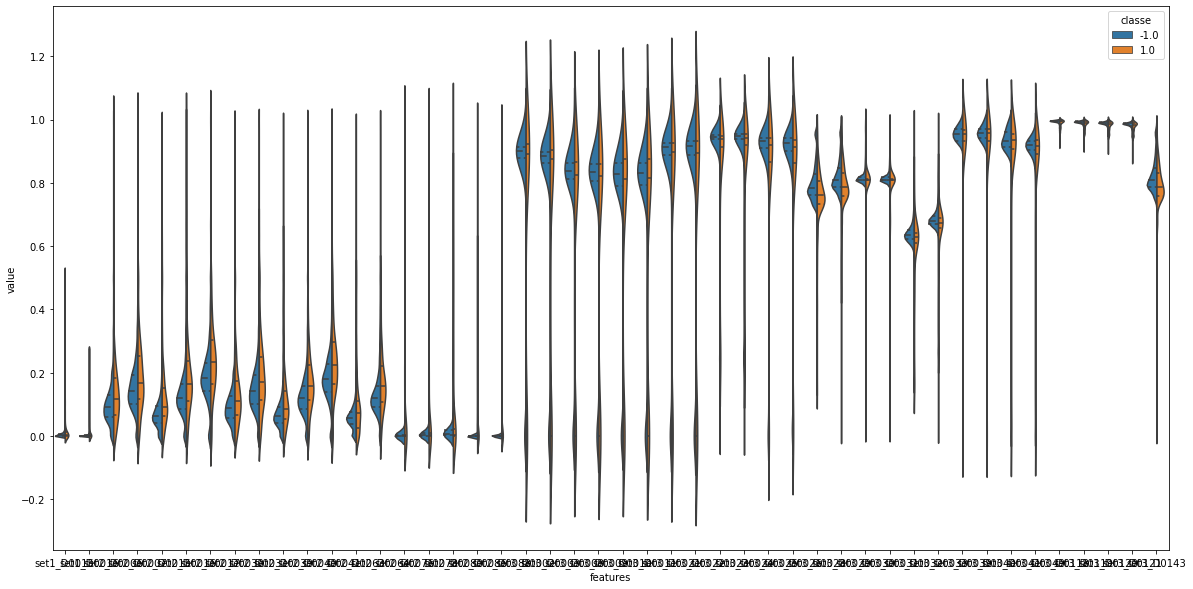

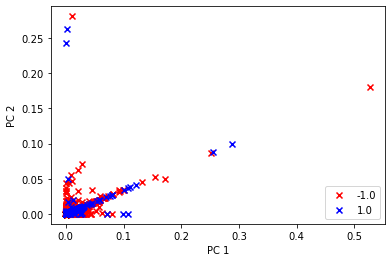

In [3]:
# Análise do balanceamento das classes
print('Análise e visualização dos dados:')
y = input_dataset.classe
ax = sns.countplot(y, label="Contagem")
N,U,P = y.value_counts()
print('Número de posts comuns:', N)
print('Número de posts não reconhecidos (podem ser phishing ou não):', U)
print('Número de posts phishing:', P)
plt.show()

# matriz de diagramas scatter 
#sns.pairplot(input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)], hue='classe', height=3.5);
#plt.show()

# matrizes de covariancia e correlação
#df_covariance = input_dataset.iloc[:,:-1].cov()
#df_correlation = input_dataset.iloc[:,:-1].corr()
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
#sns.heatmap(df_covariance, annot=True, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, ax=ax1)
#plt.title('Covariância')
#sns.heatmap(df_correlation, annot=True, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, ax=ax2)
#plt.title('Correlação')
#plt.show()

K = input_dataset.loc[test_dataset.iloc[:,:].values.T[0]]
K = K.drop('classe', axis=1).values

# Diagramas de caixa
plt.figure(figsize=(20,10))
data = pd.melt(input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)],
               id_vars="classe", var_name="features", value_name='value')
sns.boxplot(x='features', y='value', hue='classe', data=data)
plt.show()

# diagramas de violino
plt.figure(figsize=(20,10))
sns.violinplot(x='features', y='value', hue='classe', data=data, split=True, inner="quartile")
plt.show()

# Separação de atributos e classe para 
utils.printPCA(input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1))].drop('classe', axis=1).values,
               input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values)    

utils.beep(1, 600)   

---
### Preparo dos dados e experimentos para encontrar os melhores hiperparâmetros

Nesta seção os dados são separados em duas partes: treino e testes. Esta estratégia foi utilizada para posterior comparação com a validação de modelos utilizandos K-folds.
Para encontrar os melhores hiperparâmetros foi utilizada a classe GridSearchCV e devido o seu alto custo computacional e não existência da necessidade de executá-las sempre, a sua chamada é condicionada às variáveis booleanas evaluate_svm_hiperparameters, evaluate_rfc_hiperparameters e evaluate_lrc_hiperparameters serem verdadeiras.

In [4]:
from sklearn.model_selection import train_test_split
from scripts import utils
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

evaluate_svm_hiperparameters = False # Busca os melhores parâmetros para as máquinas de vetores de suporte
evaluate_rfc_hiperparameters = False # Busca os melhores parâmetros para as florestas aleatórias
evaluate_lrc_hiperparameters = False # Busca os melhores parâmetros para a regressão linear

X_total = input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].drop('classe', axis=1).values
y_total = input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values

print('Removendo amostras outliers')
X, y = utils.remove_outliers(X_total, y_total)

print(X.shape, y.shape)
print('Separando a base em treino e teste')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, shuffle=True, stratify=y)


cv = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)

scores = ['balanced_accuracy', 'f1', 'roc_auc']

if evaluate_svm_hiperparameters == True:
    print('Buscando os melhores parâmetros para as máquinas de vetores de suporte:')
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': ['scale', 1e-3, 1e-4], 'C': [1, 10, 100, 200, 400, 600, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 200, 400, 600, 1000]},
                        {'kernel': ['poly'], 'C': [1, 10, 100, 200, 400, 600, 1000], 'degree': [2,3,4,5,6], 'gamma': ['scale', 1e-3, 1e-4]}]

    

    for score in scores:
        clf = GridSearchCV(
                svm.SVC(class_weight='balanced', random_state=1), tuned_parameters, scoring=score, cv=cv
            )
        clf.fit(X, y)

        print('Os melhores parâmetros encontrados para a pontuação %s foram:' % score)
        print(clf.best_params_)

    
if evaluate_rfc_hiperparameters == True:    
    print('Buscando os melhores parâmetros para as florestas aleatórias:')

    tuned_parameters = { 'n_estimators': [100, 200, 500],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_depth' : [None, 2,3,4,5,6,7,8],
                         'criterion' :['gini', 'entropy']}

    for score in scores:
        clf = GridSearchCV(
                RandomForestClassifier(class_weight='balanced'), tuned_parameters, scoring=score, cv=cv
            )
        clf.fit(X_train, y_train)

        print('Os melhores parâmetros encontrados para a pontuação %s foi:' % score)
        print(clf.best_params_)

utils.beep(1, 700)

Removendo amostras outliers
Amostras =1 mantidas: 219 de 272
Amostras =-1 mantidas: 3194 de 4038
(3413, 46) (3413,)
Separando a base em treino e teste


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais ensinados no curso e executando os métodos inteligentes

Número de amostras acrescentadas ao dataset de treinamento: 31287 21018 10269
SVM poly------------------------------------------------------------------------------------
Acurácia Treino: 0.9820190829732316
Acurácia Teste: 0.7727006444053895
AUC score: 0.7396880514601241
F1 score: 0.26515151515151514
[[1249  348]
 [  40   70]]


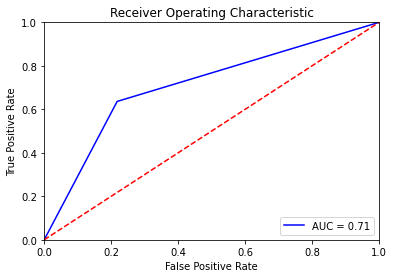

Cross roc_auc: 0.997 (0.001)------------------
Cross f1: 0.979 (0.002)------------------
Cross f1_micro: 0.987 (0.001)------------------
Cross f1_macro: 0.985 (0.001)------------------
Cross f1_weighted: 0.987 (0.001)------------------
Cross accuracy: 0.987 (0.001)------------------
Cross balanced_accuracy: 0.988 (0.001)------------------


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.semi_supervised import LabelSpreading
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import resample


scoring_list=['roc_auc', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted', 'accuracy', 'balanced_accuracy']

results = pd.DataFrame()

model_list = [
    ['SVM poly', svm.SVC(kernel='poly', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    #['SVM linear', svm.SVC(kernel='linear', C=100, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    #['SVM rbf', svm.SVC(kernel='rbf', C=1000, gamma=0.0001, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    #['SVM rbf_ra', svm.SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    #['SVM rbf_ba', svm.SVC(kernel='rbf', C=400, gamma='scale', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    #['SVM rbf_f1', svm.SVC(kernel='rbf', C=600, gamma=0.001, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    #['Random Forest', RandomForestClassifier(max_depth=2, class_weight='balanced', random_state=1), 0],
    #['Logistic Regression', LogisticRegression(random_state=1, class_weight='balanced', max_iter=15000), 0],
    #['Multinomial NB', MultinomialNB(), 0],
    #['KNN', KNeighborsClassifier(weights='distance'), 0]
]
X_bal = X
y_bal = y
# Pré balanceamento dos dados utilizando a técnica de oversampling
X_train_bal, y_train_bal = utils.balance_classes(X_train, y_train)

#X_bal, y_bal = utils.balance_classes(X, y)

semi_model = svm.SVC(kernel='poly', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1)
 # População dos dados não classificados com o melhor classificador encontrado com os resultados mais confiáveis
if True:
    samples = backup_dataset[(backup_dataset.classe!=-1)&(backup_dataset.classe!=1)&(backup_dataset.classe!=0)].iloc[:,mask].drop('classe', axis=1).values
    X_semi, y_semi, proba_mask = utils.add_samples(semi_model, X_train_bal, y_train_bal, samples)

    print('Número de amostras acrescentadas ao dataset de treinamento:', X_semi.shape[0], 
                                                                          np.sum(y_semi==-1), np.sum(y_semi==1))
    X_train_bal = np.concatenate([X_train_bal, X_semi], axis=0)
    y_train_bal = np.concatenate([y_train_bal, y_semi], axis=0)
    X_bal = np.concatenate([X_bal, X_semi], axis=0)
    y_bal = np.concatenate([y_bal, y_semi], axis=0)

if False:
    X_train_bal, y_train_bal = utils.balance_classes(X_train_bal, y_train_bal)
    X_bal, y_bal = utils.balance_classes(X_bal, y_bal)

    # População dos dados não classificados com o melhor classificador encontrado com os resultados mais confiáveis
    samples = samples[~proba_mask]
    X_semi, y_semi, proba_mask = utils.add_samples(semi_model, X_train_bal, y_train_bal, samples)
    print('Número de amostras acrescentadas ao dataset de treinamento:', X_semi.shape[0], 
                                                                          np.sum(y_semi==-1), np.sum(y_semi==1))
    X_train_bal = np.concatenate([X_train_bal, X_semi], axis=0)
    y_train_bal = np.concatenate([y_train_bal, y_semi], axis=0)
    X_bal = np.concatenate([X_bal, X_semi], axis=0)
    y_bal = np.concatenate([y_bal, y_semi], axis=0)

#X_train_bal, y_train_bal = utils.balance_classes(X_train_bal, y_train_bal)
#X_bal, y_bal = utils.balance_classes(X_bal, y_bal)

# Configura K folds estratificados, ou seja, mantendo as mesmas proporções entre classes
cv = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)


for model in model_list:
    print(model[0] + '------------------------------------------------------------------------------------')
    y_pred = utils.evaluate_model(model[1], X_train_bal, y_train_bal, X_test, y_test)
    
    for scoring in scoring_list:
        scores = cross_val_score(model[1], X_bal, y_bal, scoring=scoring, cv=cv, n_jobs=-1)
        print('Cross ' + scoring + ': %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))
        results.loc[model[0], scoring] = np.mean(scores)
    
    results.loc[model[0], 'TN'] = confusion_matrix(y_test, y_pred)[0][0]
    results.loc[model[0], 'TP'] = confusion_matrix(y_test, y_pred)[1][1]


utils.beep(1, 800)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos

In [6]:
display(results)
utils.beep(3, 1000)

,roc_auc,f1,f1_micro,f1_macro,f1_weighted,accuracy,balanced_accuracy,TN,TP
SVM poly,0.997288,0.978643,0.986916,0.984606,0.986965,0.986916,0.988274,1249.0,70.0


---
### Criação do arquivo de sumissão no Kaggle

Na etapa final, o arquivo submission.csv é criado para ser enviado ao Kaggle de acordo com os padrões pré-definidos pela proposta do desafio.

In [7]:
submit_preference_score = 'SVM poly'

for model in model_list:
    if model[0]==submit_preference_score:
        best_model = model[1]
        best_model_name = model[0]

print('Criando arquivo de submissão para o modelo: ' + submit_preference_score)    
    
    
print('Printing model to submission.csv ###################################################################')
clf= best_model.fit(X_bal, y_bal)
y_pred_submission = clf.predict_proba(K)[:,1]
result = np.zeros((K.shape[0],2))
for i in range(K.shape[0]):
    result[i][0] = test_dataset.iloc[:,:].values.T[0][i]
    result[i][1] = y_pred_submission[i]
resultdf = pd.DataFrame(data=result, columns=["Id", "Predicted"])
resultdf['Id'] = resultdf['Id'].astype(int)
resultdf['Predicted'] = resultdf['Predicted'].round(decimals=5)
resultdf.to_csv('submission.csv', index=False, float_format='%.5f')
print('####################################################################################################')

utils.beep(5, 200)

Criando arquivo de submissão para o modelo: SVM poly
Printing model to submission.csv ###################################################################
####################################################################################################
